<div style="text-align: right"> IMC Prosperity </div>

<left> Team Tempname1 </left> 
<br>
<left>February 2024</left>

<h2><center> Round 2: Data Exploration </center></h2>

### Import Statements

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from utils.DataEngine import LogInterpreter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load Data

The codes below separately load all 3 csv files as dataframes. The column 'day' has been shifted to the begining of all dataframes and all columns have been converted to numeric. Also, a 4th dataframe 'orchids' has been created that combines all 3 dataframes in order of day. Within that dataframe, a new column 'new_timestamp' has been created to plot time series reflecting values from days -1 to 1 to avoid overlapping timestamp values.

In [137]:
prices_neg1 = pd.read_csv("prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_neg1

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490
...,...,...,...,...,...,...,...,...
9996,-1,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764
9997,-1,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300
9998,-1,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856
9999,-1,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424


In [138]:
prices_0 = pd.read_csv("prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_0

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000
1,0,100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990
2,0,200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980
3,0,300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970
4,0,400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950
...,...,...,...,...,...,...,...,...
9996,0,999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100
9997,0,999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806
9998,0,999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530
9999,0,999900,986.75,1.3,10.5,-2.6,1700.8980,64.997260


In [139]:
prices_pos1 = pd.read_csv("prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['DAY', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

prices_pos1

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,1,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000
1,1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710
2,1,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395
3,1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030
4,1,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640
...,...,...,...,...,...,...,...,...
9996,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490
9997,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530
9998,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620
9999,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780


In [140]:
orchids = pd.concat([prices_neg1, prices_0, prices_pos1], ignore_index=True)
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


### Visualize Data

The codes below plot timeseries plots for all variables in the data set. 

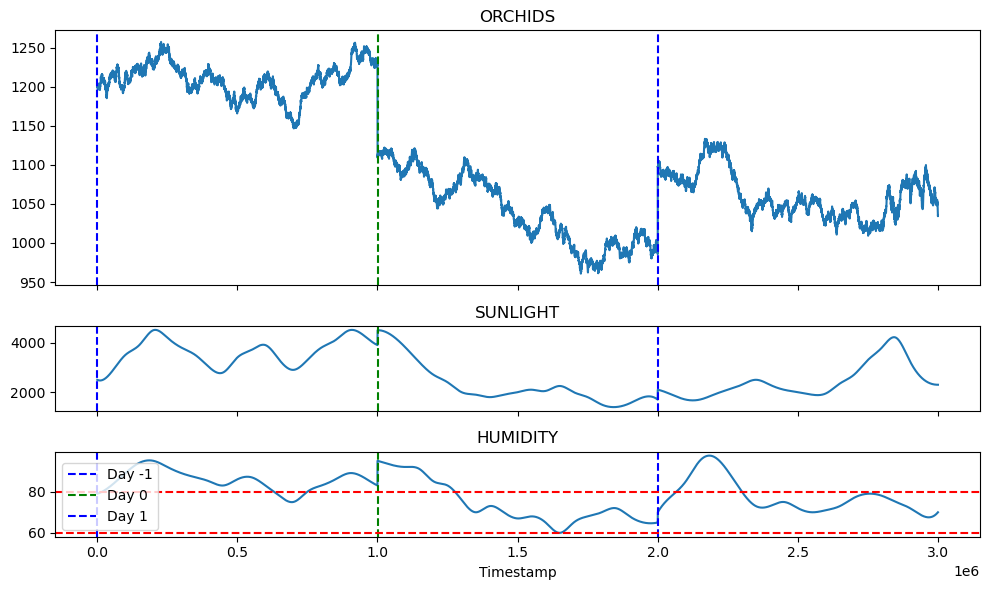

In [141]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'])
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'])
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'])
    axs[2].set_title('HUMIDITY')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    # Create dashed line between 60 to 80 for HUMIDITY plot
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

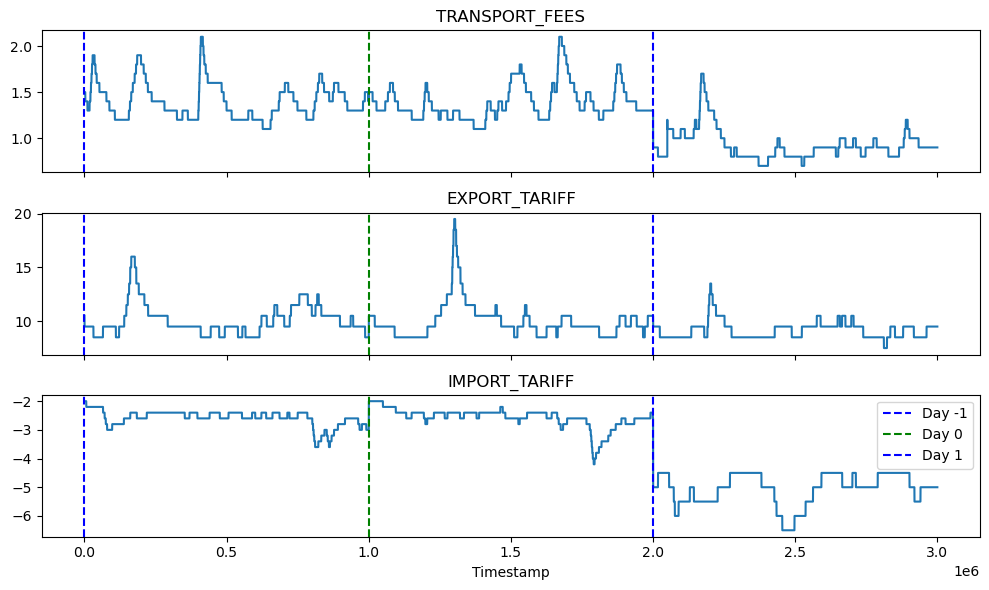

In [98]:
def plot_orchids_fees_tariffs(df):
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
    
    # Plot TRANSPORT_FEES vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['TRANSPORT_FEES'])
    axs[0].set_title('TRANSPORT_FEES')
    
    # Plot EXPORT_TARIFF vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['EXPORT_TARIFF'])
    axs[1].set_title('EXPORT_TARIFF')
    
    # Plot IMPORT_TARIFF vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['IMPORT_TARIFF'])
    axs[2].set_title('IMPORT_TARIFF')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_fees_tariffs(orchids)

### Analyze Data

The code below produces a correlation matrix of all variables in the dataframe. 

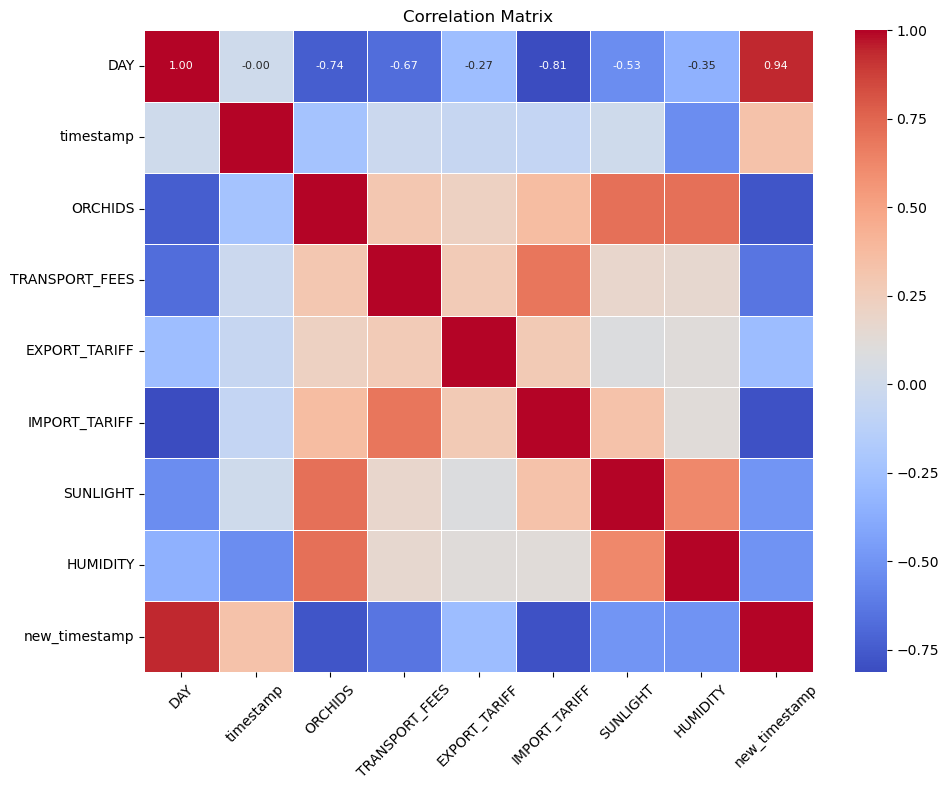

In [112]:
correlation_matrix = orchids.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The code below runs an OLS regression using sunlight and humidity to predict the price of orchids

In [118]:
import statsmodels.api as sm

X = orchids[['SUNLIGHT', 'HUMIDITY']]
y = orchids['ORCHIDS']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ORCHIDS   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                 2.514e+04
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:46:06   Log-Likelihood:            -1.6001e+05
No. Observations:               30003   AIC:                         3.200e+05
Df Residuals:                   30000   BIC:                         3.201e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        693.3201      2.593    267.428      0.0

In [144]:
X = orchids[['SUNLIGHT', 'HUMIDITY']]
y = orchids['ORCHIDS']

model = sm.OLS(y, X, has_constant=False)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                ORCHIDS   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.147e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:28:58   Log-Likelihood:                     -1.7830e+05
No. Observations:               30003   AIC:                                  3.566e+05
Df Residuals:                   30001   BIC:                                  3.566e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['has_constant']
  warnings.warn(msg, ValueWarning)


### Sunlight Conversion

# Still working on it

In [120]:
daily_sunlight = (orchids.groupby(['DAY'])['SUNLIGHT'].sum())/60000
daily_sunlight

DAY
-1    603.352013
 0    379.960218
 1    405.363262
Name: SUNLIGHT, dtype: float64

In [109]:
daily_sunlight = orchids.groupby(['DAY'])['SUNLIGHT'].median()

# Calculate number of hours of sunlight per day
average_sunlight_per_hour = 2500  # Average sunlight per hour
hours_of_sunlight_per_day = daily_sunlight / average_sunlight_per_hour

# Add the number of hours of sunlight per day to the DataFrame
orchids['Hours_of_Sunlight_Per_Day'] = orchids['DAY'].map(hours_of_sunlight_per_day)

orchids

,DAY,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,Hours_of_Sunlight_Per_Day
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0,1.447900
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100,1.447900
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,1.447900
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,1.447900
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,1.447900
...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800,0.972775
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900,0.972775
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000,0.972775
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100,0.972775


In [133]:
orchids = orchids[orchids['DAY'] == 1]
orchids = orchids[orchids['timestamp'] <= 10000]
daily_sunlight = orchids['ORCHIDS'].median()
daily_sunlight

1099.75

In [123]:
# Function to split the sunlight data into equal parts and calculate median for each part
def split_and_median(series, num_parts):
    # Calculate the number of elements per part
    elements_per_part = len(series) // num_parts
    
    # Split the series into equal parts
    parts = [series[i*elements_per_part:(i+1)*elements_per_part] for i in range(num_parts)]
    
    # Calculate the median for each part, excluding NaN values
    medians = [np.nanmedian(part) for part in parts]
    
    return medians

# Apply the function to each day and concatenate the results
hourly_median_sunlight = orchids.groupby('DAY').apply(split_and_median, num_parts=num_parts)

# Calculate the final median for each day
final_median_sunlight = hourly_median_sunlight.groupby('DAY').median()

# Print the final median sunlight for each day
print(final_median_sunlight)

TypeError: agg function failed [how->median,dtype->object]

In [116]:
average_sunlight = 7/24*10000
average_sunlight

2916.666666666667